# DA Final project:

# Group 20

# IMDb 5000+ Movies & Multiple Genres Dataset

## Name of students:
Omri Gal Avraham<br>
Tair Maimon<br>
Eliran Haim Shimoni<br>






<div>
<img src="https://github.com/ProjectOTE/projectOTE/blob/main/photo.jpg?raw=true" width="800"/>
</div>

In [1]:
! pip install --quiet ipywidgets
import ipywidgets as widgets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

#### Informtion on the data
The topic we have chosen in our project is the analysis of 5000 IMDb movie data between the years 1920 - 2022.<br>taken from [Kaggle](https://www.kaggle.com/datasets/rakkesharv/imdb-5000-movies-multiple-genres-dataset)

#### About Dataset
The IMDb 5000+ Movies & Multiple Genres Association is a collection of data that provides information on more than 5000 movies from around the world, including information such as year of production, directors, actors, ratings, movie lengths, profitability, and more.<br> The data also contains information on major genres and additional genres, allowing researchers, programmers and those interested in the field to analyze the film industry and determine trends, behavior patterns and audience feelings towards different films.<br>
 the data allows a complex and in-depth approach to the dynamics of the film industry, which allows users to better understand the various processes in which it is conducted and to determine forecasts, strategies, etc.

In [2]:
url = 'https://raw.githubusercontent.com/ProjectOTE/projectOTE/main/IMDb_All_Genres_etf_clean1.csv' 
movies_data = pd.read_csv(url)
movies_data.shape

(5562, 10)

In [3]:
movies_data.columns

Index(['Movie_Title', 'Year', 'Director', 'Actors', 'Rating', 'Runtime(Mins)',
       'Censor', 'Total_Gross', 'main_genre', 'side_genre'],
      dtype='object')

In [4]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


- #### we see that in **'Total_Gross'** column  we have object type with float type so we need to clean the **'Total_Gross'** column that the only type will be just float for any calculations.

In [5]:
clean_movies_data = movies_data
clean_movies_data['Total_Gross'] = pd.to_numeric(clean_movies_data['Total_Gross'].replace('[\$,M]', '', regex=True), errors='coerce')

In [6]:
clean_movies_data.rename(columns={'Total_Gross': 'Total_Gross(M$)'}, inplace=True)


### Cheking if there is null value in each columclean_movies_dataour DF:

In [7]:
clean_movies_data.isnull().sum()

Movie_Title          0
Year                 0
Director             0
Actors               0
Rating               0
Runtime(Mins)        0
Censor               0
Total_Gross(M$)    861
main_genre           0
side_genre           0
dtype: int64

- There is 861 null values rows.

In [8]:
clean_movies_data = clean_movies_data.dropna()
clean_movies_data.isnull().sum()

Movie_Title        0
Year               0
Director           0
Actors             0
Rating             0
Runtime(Mins)      0
Censor             0
Total_Gross(M$)    0
main_genre         0
side_genre         0
dtype: int64

- Now there are no null values in the DataFrame

In [9]:
ordinal_mapping = {'UA': 13,'U': 0,'A': 18,'R': 18,'Not Rated': 18, 'PG': 7,'PG-13': 13,'U/A': 12,'7': 7,'16': 16,'18': 18,'13': 13, '12+': 12,'UA 16+': 16,'UA 13+': 13,'15+': 15,'All': 0,'Unrated': 18, 'G': 0,'UA 7+': 7,'M/PG': 7,'NC-17': 17}
clean_movies_data['Censor_encoded'] = clean_movies_data['Censor'].map(ordinal_mapping)
clean_movies_data = clean_movies_data[clean_movies_data['Censor']!="(Banned)"]
clean_movies_data.head(5)

C:\Users\omria\AppData\Local\Temp\ipykernel_55896\4240427017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movies_data['Censor_encoded'] = clean_movies_data['Censor'].map(ordinal_mapping)


,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross(M$),main_genre,side_genre,Censor_encoded
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534.86,Action,"Crime, Drama",13.0
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377.85,Action,"Adventure, Drama",0.0
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,292.58,Action,"Adventure, Sci-Fi",13.0
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,342.55,Action,"Adventure, Drama",13.0
5,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,178,U,315.54,Action,"Adventure, Drama",0.0


### Description of the columns:
- **Movie_Title** : Consist of 5000+ Movie Titles (5000+ Unique Values)
- **Year** : Ranging from 1920s to 2022 (99 Unique Values)
- **Director** : Names the Director (2000+ Unique Values)
- **Actors** : Names the Actors (5000+ Unique & Multiple Values)
- **Rating** : Titles rated for 10 by 25k+ Voters (74+ Unique Values)
- **main_genre** : Main Genre of the Title (13+ Unique Values)
- **side_genre** : Side / Multiple Genre of the Movie (144+ Unique & Multiple Values)
- **Runtime(Mins)** : Total duration of the movie in Minutes (156+ Unique Values)
- **Censor** : Censorship of the Movie (25+ Unique Values)
- **Total_Gross** : Total Box-Office Collection of the Movie (3500+ Unique Values)
- **Censor_encoded** : Censorship of the Movie by number of age


<font size="7" color="purple">Analysis:</font>




<div>
<img src="https://github.com/ProjectOTE/projectOTE/blob/main/children.jpg?raw=true " width="600"/>
</div>

<font size="5" color="blue">age coded censorship over the years:</font>



#### The allowed viewing age between the years according to the crime genre.

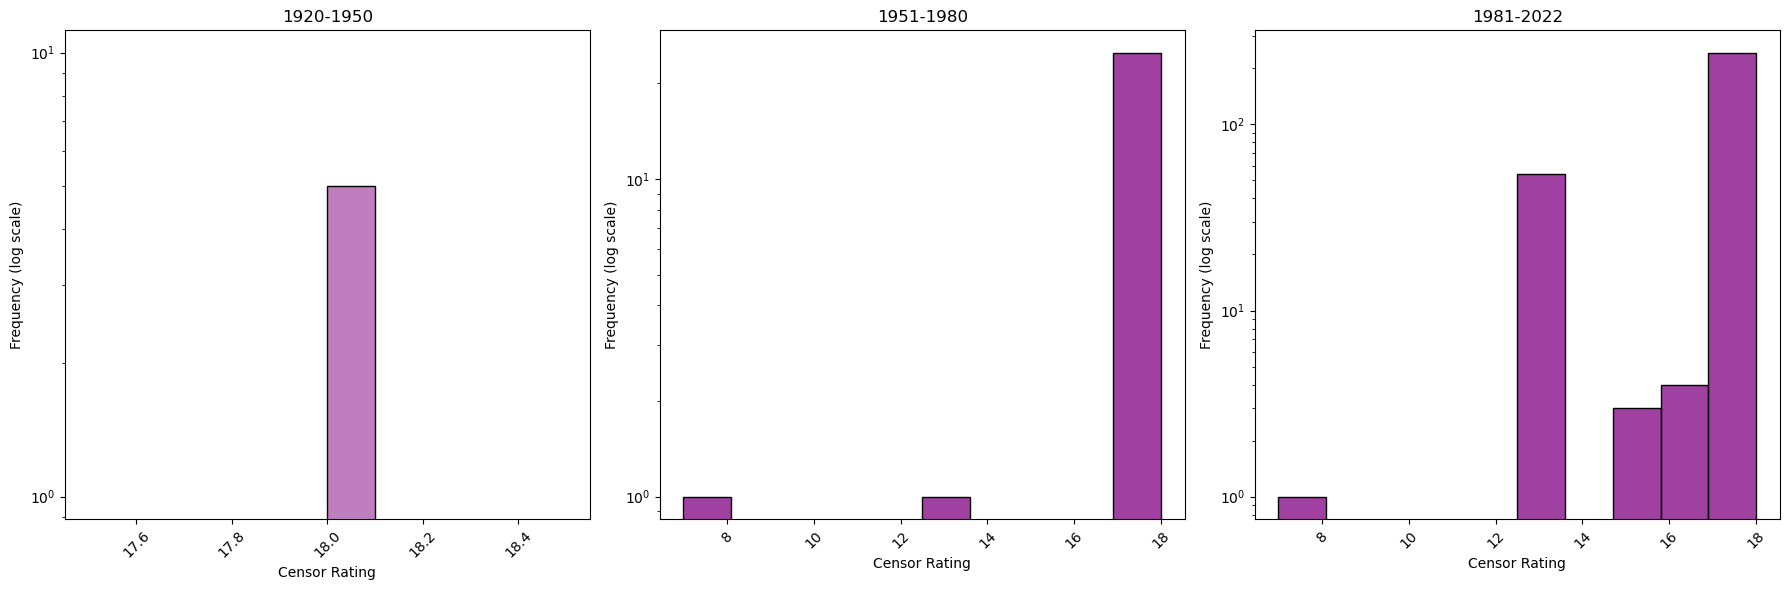

In [10]:
filtered_data = clean_movies_data[clean_movies_data['Censor_encoded'] != 0]
df = filtered_data
crime_data_1920_1950 = df[(df['Year'] >= 1920) & (df['Year'] <= 1950) & (df['main_genre'] == 'Crime')]
crime_data_1951_1980 = df[(df['Year'] >= 1951) & (df['Year'] <= 1980) & (df['main_genre'] == 'Crime')]
crime_data_1981_2022 = df[(df['Year'] >= 1981) & (df['Year'] <= 2022) & (df['main_genre'] == 'Crime')]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data=crime_data_1920_1950, x='Censor_encoded', bins=10, kde=True, log_scale=(False,True),color = 'purple')
plt.title("1920-1950")
plt.xlabel("Censor Rating")
plt.ylabel("Frequency (log scale)")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.histplot(data=crime_data_1951_1980, x='Censor_encoded', bins=10, log_scale=(False,True),color = 'purple')
plt.title("1951-1980")
plt.xlabel("Censor Rating")
plt.ylabel("Frequency (log scale)")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.histplot(data=crime_data_1981_2022, x='Censor_encoded', bins=10, log_scale=(False,True),color = 'purple')
plt.title("1981-2022")
plt.xlabel("Censor Rating")
plt.ylabel("Frequency (log scale)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### The allowed viewing age between the years according to the Horror genre

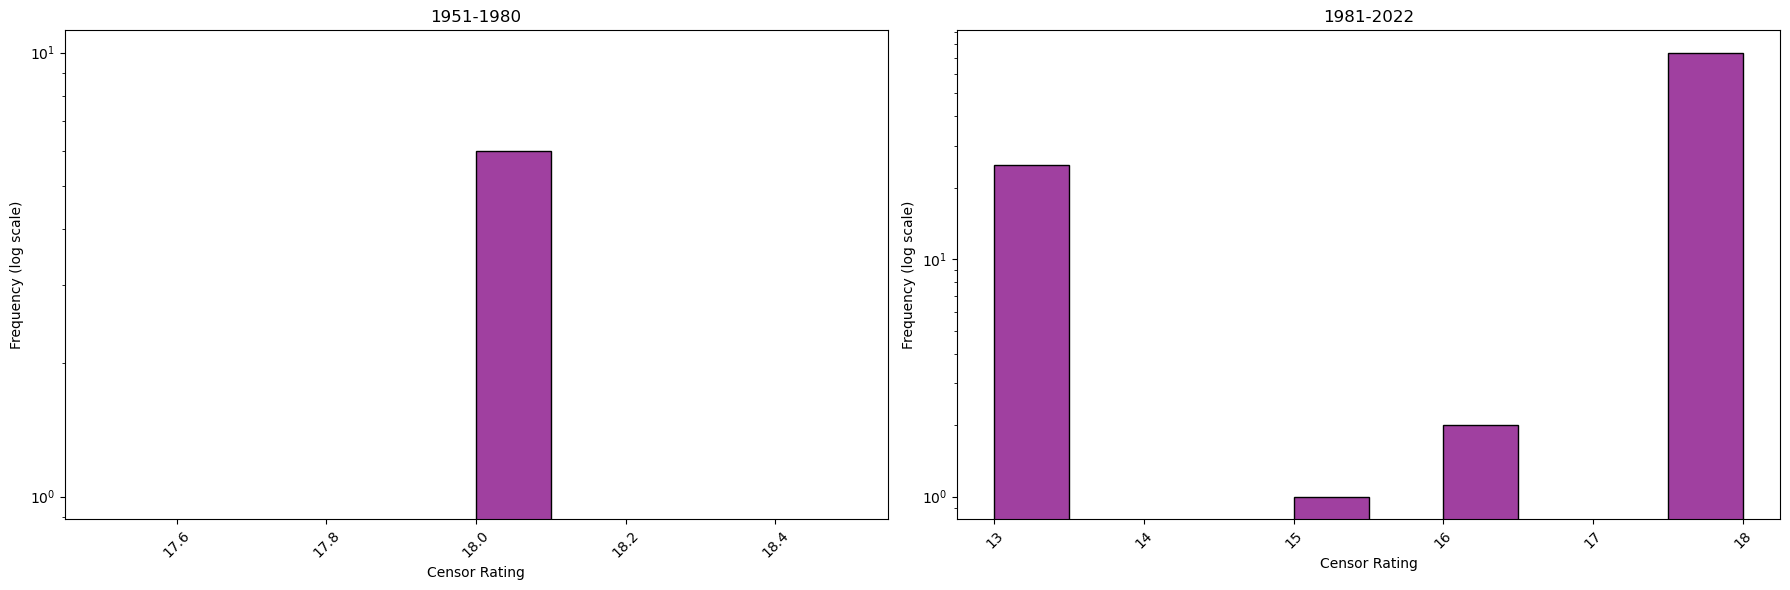

In [11]:
df = filtered_data
crime_data_1951_1980 = df[(df['Year'] >= 1951) & (df['Year'] <= 1980) & (df['main_genre'] == 'Horror')]
crime_data_1981_2022 = df[(df['Year'] >= 1981) & (df['Year'] <= 2022) & (df['main_genre'] == 'Horror')]

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=crime_data_1951_1980, x='Censor_encoded', bins=10, log_scale=(False,True),color = 'purple')
plt.title("1951-1980")
plt.xlabel("Censor Rating")
plt.ylabel("Frequency (log scale)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(data=crime_data_1981_2022, x='Censor_encoded', bins=10, log_scale=(False,True),color = 'purple')
plt.title("1981-2022")
plt.xlabel("Censor Rating")
plt.ylabel("Frequency (log scale)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<font size="7" color="green">Conclusion 1</font>




### The conclusion from the graphs is that as time goes by, there is a trend of expansion in the age groups in which it is possible to watch programs or content with lower ratings.  That is, it seems that the company or the publishing organization lowers the age limits at which it is permissible to view certain content due to the desire to reach a wider audience and increase the viewing and use of the content they publish or provide.

<font size="5" color="blue">The Correlation Between Movie Total Gross and Rating</font>




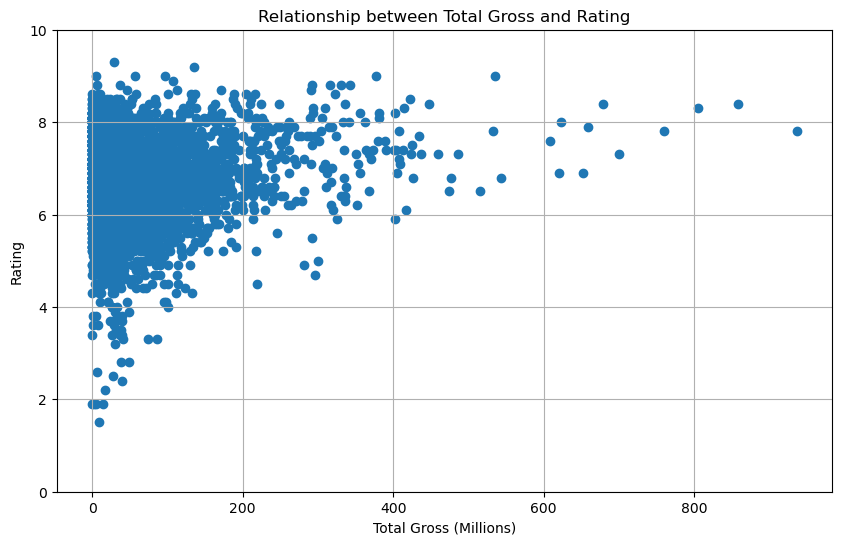

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_movies_data['Total_Gross(M$)'], clean_movies_data['Rating'])
plt.xlabel('Total Gross (Millions)')
plt.ylabel('Rating')
plt.title('Relationship between Total Gross and Rating')
plt.ylim(0,10)
plt.grid(True)
plt.show()

In [13]:
clean_movies_data.groupby(['Year'])[['Rating']].median()

,Rating
Year,
1921,8.30
1924,8.20
1925,8.10
1926,8.20
1927,8.20
...,...
2017,6.70
2018,6.70
2019,6.70


## Rating Classification

<span style="color:blue">High rating is above 6</span><br>
<span style="color:orange">Low rating is below 6</span>

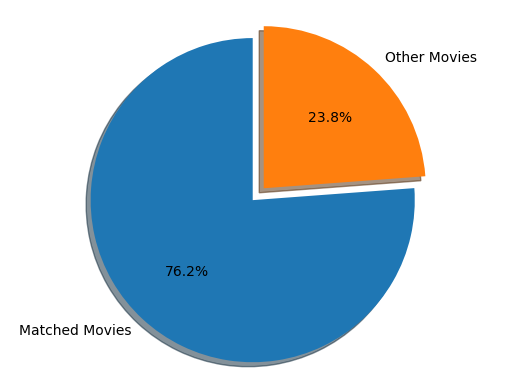

In [14]:
filtered_movies = clean_movies_data[(clean_movies_data['Rating'] > 6) & (clean_movies_data['Total_Gross(M$)'] >= 0) & (clean_movies_data['Total_Gross(M$)'] <= 200)]
percentage = len(filtered_movies) / len(clean_movies_data) * 100
labels = 'Matched Movies', 'Other Movies'
sizes = [percentage, 100 - percentage]
explode = (0.1, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

- #### We can see that 76.2 percent of the total films were rated above 6 which is considered "high rating".     but the film's revenue is less than 200 million


<font size="7" color="green">Conclusion 2</font>





#### As we can see from the graph, there doesn't seem to be a direct correlation between a movie's total gross and its ratings. This suggests that there are movies with high earnings that did not receive good reviews, and vice versa - movies with low earnings that received good reviews.

#### This conclusion may be interesting for several reasons. For example<bar>, movies with high earnings films that are quickly paced and sell many tickets, but do not necessarily receive high ratings from the public or critics.

<font size="5" color="blue">Effect of time period on the most popular genre:</font>







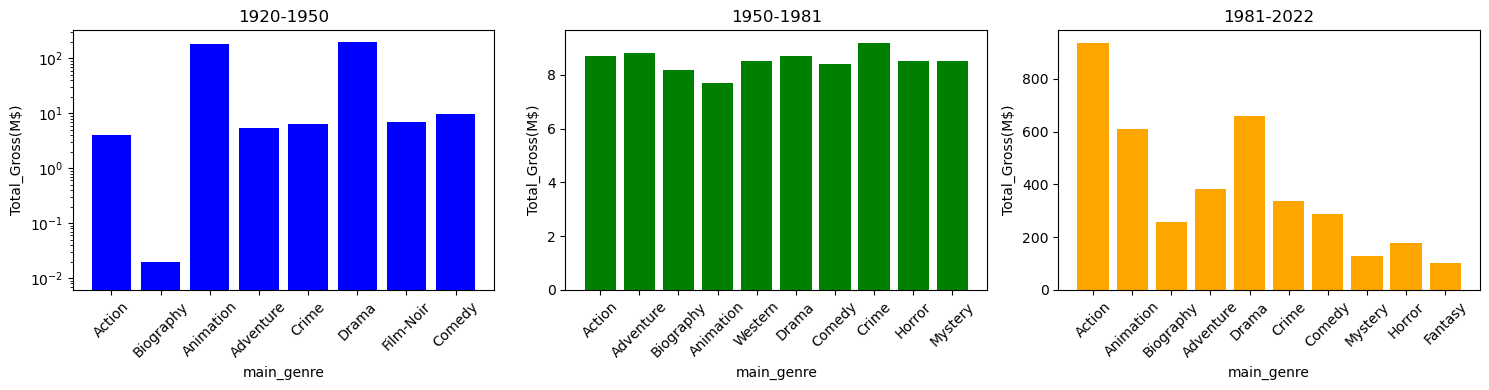

In [15]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.yscale('log')
plt.bar(clean_movies_data[clean_movies_data['Year'] <= 1950]['main_genre'], clean_movies_data[clean_movies_data['Year'] <= 1950]['Total_Gross(M$)'], color='blue')
plt.title('1920-1950')
plt.xlabel('main_genre')
plt.ylabel('Total_Gross(M$)')
plt.xticks(rotation=45)


plt.subplot(132)
plt.bar(clean_movies_data[(clean_movies_data['Year'] > 1950) & (clean_movies_data['Year'] <= 1981)]['main_genre'], clean_movies_data[(clean_movies_data['Year'] > 1950) & (clean_movies_data['Year'] <= 1981)]['Rating'], color='green')
plt.title('1950-1981')
plt.xlabel('main_genre')
plt.ylabel('Total_Gross(M$)')
plt.xticks(rotation=45)


plt.subplot(133)
plt.bar(clean_movies_data[clean_movies_data['Year'] > 1981]['main_genre'], clean_movies_data[clean_movies_data['Year'] > 1981]['Total_Gross(M$)'], color='orange')
plt.title('1981-2022')
plt.xlabel('main_genre')
plt.ylabel('Total_Gross(M$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- #### We divided into 3 different periods and wanted to compare between each period which genre is the most popular in terms of profit.

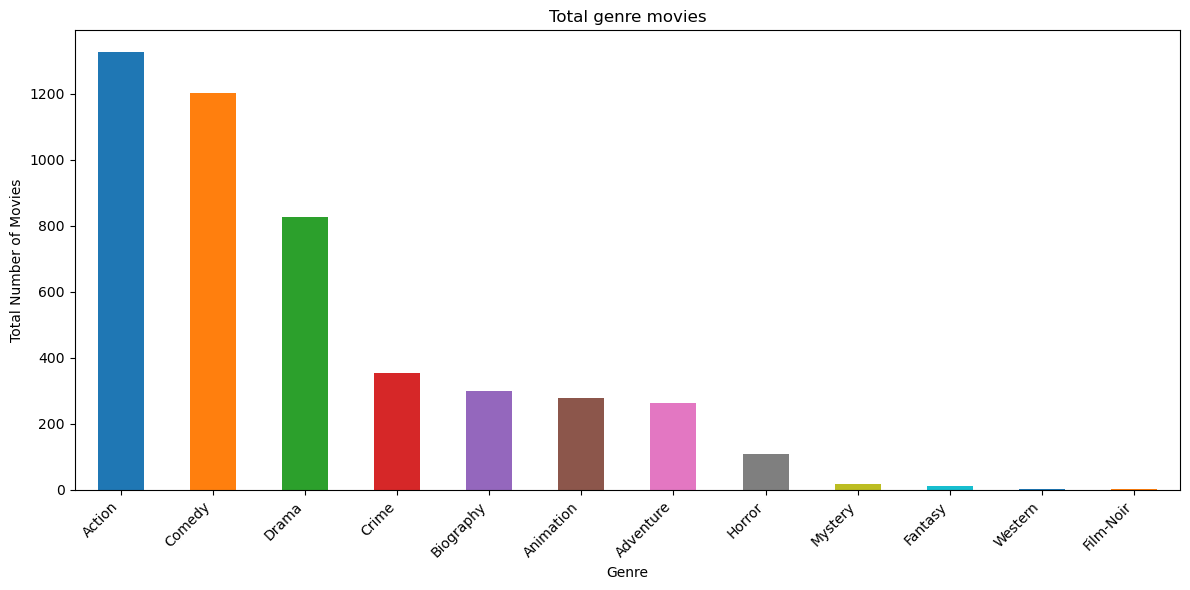

In [16]:
genre_counts= clean_movies_data['main_genre'].value_counts()
palette = sns.color_palette("tab10", len(genre_counts))

genre_counts.plot(kind='bar', figsize=(12, 6), color=palette)

plt.yscale('linear')

plt.title('Total genre movies')
plt.xlabel('Genre')
plt.ylabel('Total Number of Movies')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- #### We can't understand the graph properly, that's why we made a log that will be more readable and understandable so that we can understand the numbers and the graph.

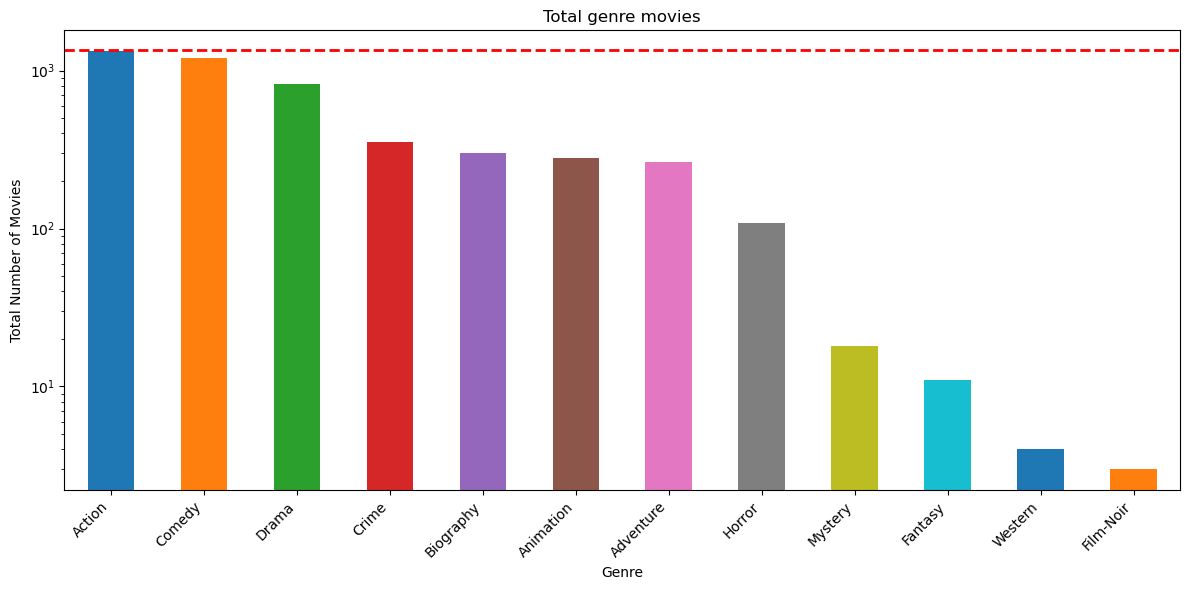

In [17]:
palette = sns.color_palette("tab10", len(genre_counts))
genre_counts.plot(kind='bar', figsize=(12, 6), color=palette)

plt.yscale('linear')
plt.yscale('log')
plt.axhline(y=1350, color='r', linestyle='--', linewidth=2)
plt.title('Total genre movies')
plt.xlabel('Genre')
plt.ylabel('Total Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- #### We can see here after a summary of the graphs that the most popular genre is: Action!

In [18]:
main_genre_category = clean_movies_data.groupby(['main_genre'])[['Total_Gross(M$)']].count()
main_genre_category

,Total_Gross(M$)
main_genre,
Action,1325
Adventure,263
Animation,279
Biography,301
Comedy,1202
Crime,354
Drama,826
Fantasy,11
Film-Noir,3


- ### You knew! According to what we analyzed, the winning combination between the types of genres according to the ratings is -

In [19]:

genre_rating_sum = clean_movies_data.groupby(['main_genre', 'side_genre'])['Rating'].mean().reset_index()
genre_rating_sum['Total_Rating'] = genre_rating_sum['Rating'].groupby(genre_rating_sum['main_genre']).transform('sum')
sorted_genre_rating_sum = genre_rating_sum.sort_values(by='Total_Rating', ascending=False)
sorted_genre_rating_sum.head()

,main_genre,side_genre,Rating,Total_Rating
0,Action,Adventure,6.850000,467.946658
37,Action,"Crime, Thriller",6.528571,467.946658
54,Action,"Fantasy, Thriller",6.400000,467.946658
53,Action,"Fantasy, Horror",6.233333,467.946658
51,Action,"Drama, Western",7.900000,467.946658


## Action!! 


<div>
<img src="https://github.com/ProjectOTE/projectOTE/blob/main/rambo.jpg?raw=true" width="600"/>
</div>

In [20]:
question1A = widgets.Textarea( placeholder='Enter your answer', description='')
question2 = widgets.Dropdown(options=['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Film-Noir','Horror','Mystery','Western'], description='')
question3 = widgets.Dropdown(options=['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Film-Noir','Horror','Mystery','Western'], description='')

display(widgets.Label('Enter your name')) 
display(question1A)
display(widgets.Label('Question 1:what is your favoraite genre?'))
display(question2)
display(widgets.Label('Question 2: what do you think is the most popular genre?'))
display(question3)

Label(value='Enter your name')

Textarea(value='', placeholder='Enter your answer')

Label(value='Question 1:what is your favoraite genre?')

Dropdown(options=('Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Fil…

Label(value='Question 2: what do you think is the most popular genre?')

Dropdown(options=('Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Fil…

<font size="7" color="green">Conclusion 3:</font>








#### It can be seen that by comparing different periods, trends are seen between the types of popular genres present for that period. There may have been some or other genres that were popular depending on the period, which also affected films of the same genre. <br> "The spirit of the time changes what people like See"

<font size="5" color="blue">It's is the quantity , or the quality  ??:</font>








<div>
<img src="https://github.com/ProjectOTE/projectOTE/blob/main/qua.jpg?raw=true" width="600"/>
</div>

- #### The best director according to the rating and total gross

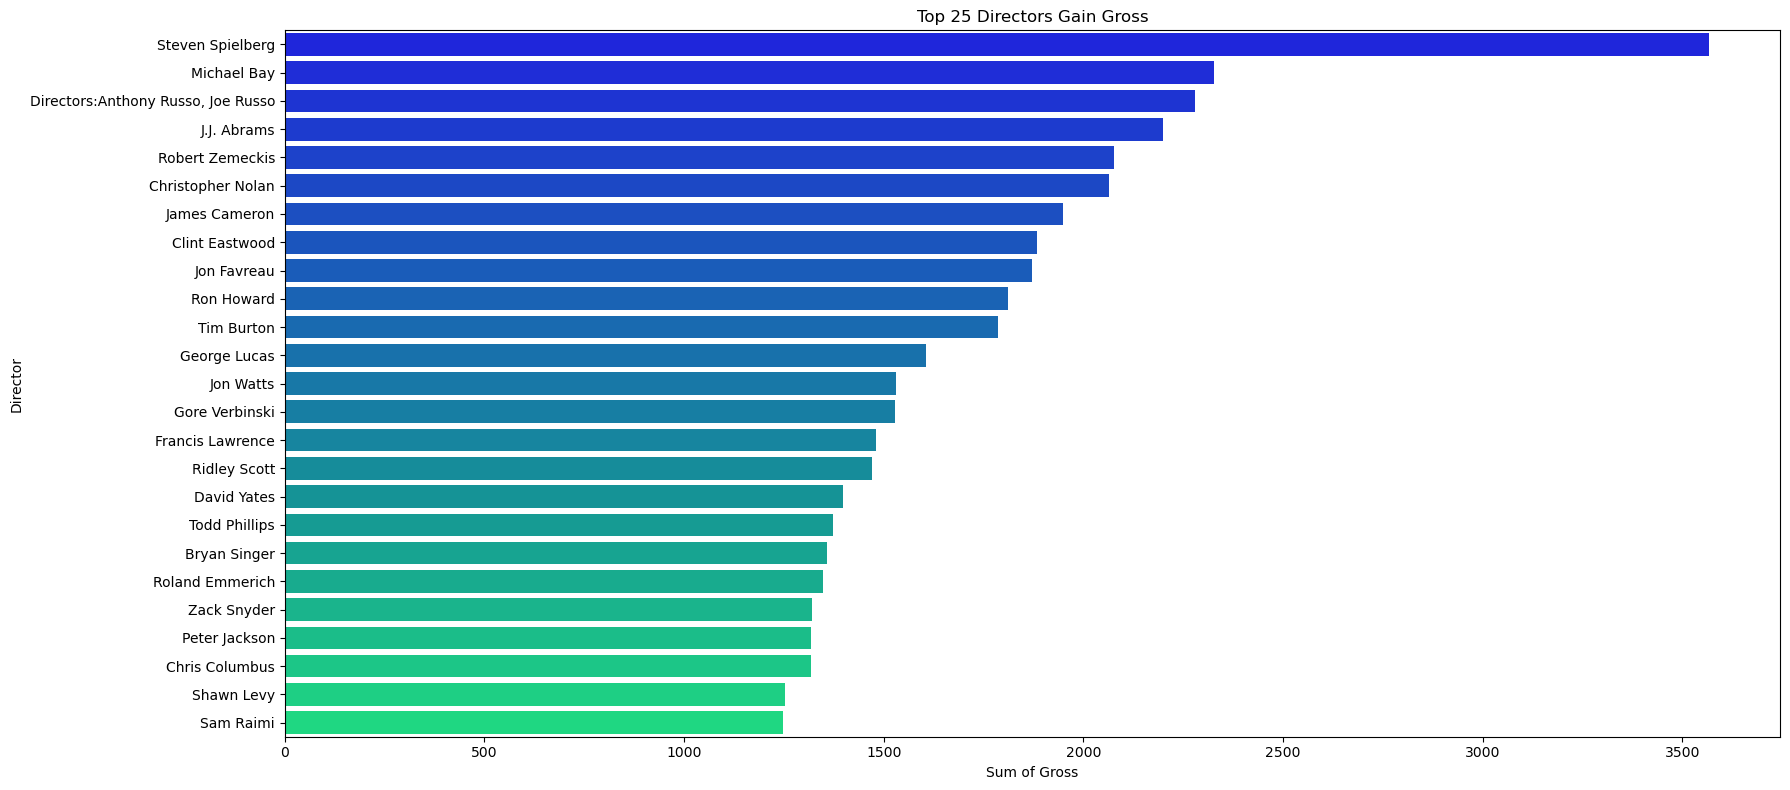

In [21]:
df_Director = clean_movies_data.groupby("Director")["Total_Gross(M$)"].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize=(18,8))
sns.barplot(y=df_Director["Director"][:25],x=df_Director["Total_Gross(M$)"][:25],palette="winter")
plt.xlabel("Sum of Gross")
plt.title("Top 25 Directors Gain Gross")
plt.tight_layout()

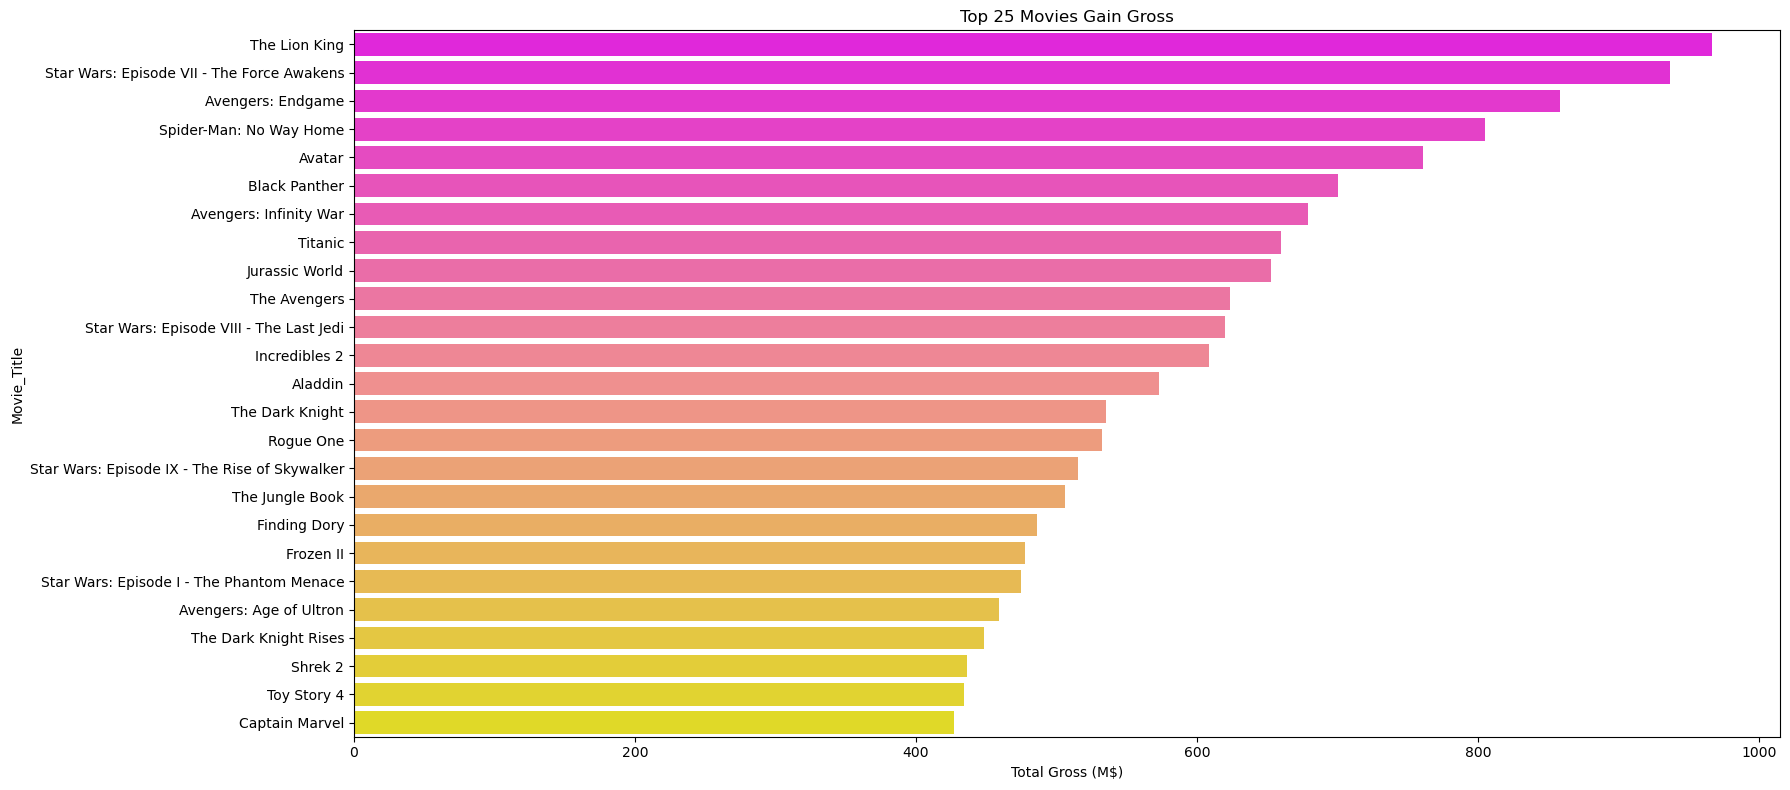

In [22]:
df_Director = clean_movies_data.groupby("Movie_Title")["Total_Gross(M$)"].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize=(18,8))
sns.barplot(y=df_Director["Movie_Title"][:25],x=df_Director["Total_Gross(M$)"][:25],palette="spring")
plt.xlabel("Total Gross (M$)")
plt.title("Top 25 Movies Gain Gross")
plt.tight_layout()

In [23]:
top_directors_movies = clean_movies_data.groupby('Director').agg({'Movie_Title': list, 'Total_Gross(M$)': 'sum'}).reset_index()

top_directors_movies.columns = ['Director', 'Movie_Title', 'Total_Gross(M$)']
top_directors_movies['Movies_Count'] = top_directors_movies['Movie_Title'].apply(len)
top_directors_movies = top_directors_movies.sort_values(by='Total_Gross(M$)', ascending=False)
top_directors_movies.reset_index(drop=True, inplace=True)  
top_directors_movies.index += 1 
top_directors_movies.head(25)

,Director,Movie_Title,Total_Gross(M$),Movies_Count
1,Steven Spielberg,"[Raiders of the Lost Ark, Jurassic Park, India...",3566.10,26
2,Michael Bay,"[The Rock, 13 Hours, Transformers, The Island,...",2326.51,13
3,"Directors:Anthony Russo, Joe Russo","[Avengers: Endgame, Avengers: Infinity War, Ca...",2280.67,5
4,J.J. Abrams,"[Star Trek, Star Wars: Episode VII - The Force...",2199.40,6
5,Robert Zemeckis,"[Allied, Romancing the Stone, Beowulf, The Wal...",2075.94,16
6,Christopher Nolan,"[The Dark Knight, Inception, The Dark Knight R...",2063.32,11
7,James Cameron,"[Terminator 2: Judgment Day, Aliens, The Termi...",1948.98,7
8,Clint Eastwood,"[Letters from Iwo Jima, American Sniper, Invic...",1883.30,30
9,Jon Favreau,"[Iron Man, Iron Man 2, Zathura: A Space Advent...",1872.02,8
10,Ron Howard,"[Rush, Willow, Solo: A Star Wars Story, In the...",1811.78,21


In [24]:
df_Director = clean_movies_data.groupby("Director")["Total_Gross(M$)"].sum().sort_values(ascending=False).reset_index()
top_directors = df_Director["Director"][:25]
top_directors_data = clean_movies_data[clean_movies_data["Director"].isin(top_directors)]
director_total_gross = top_directors_data.groupby("Director")["Total_Gross(M$)"].sum().reset_index()
director_total_gross_sorted = director_total_gross.sort_values(by='Total_Gross(M$)', ascending=False)
director_total_gross_sorted.index = range(1, len(director_total_gross_sorted) + 1)
director_total_gross_sorted 

,Director,Total_Gross(M$)
1,Steven Spielberg,3566.10
2,Michael Bay,2326.51
3,"Directors:Anthony Russo, Joe Russo",2280.67
4,J.J. Abrams,2199.40
5,Robert Zemeckis,2075.94
6,Christopher Nolan,2063.32
7,James Cameron,1948.98
8,Clint Eastwood,1883.30
9,Jon Favreau,1872.02
10,Ron Howard,1811.78


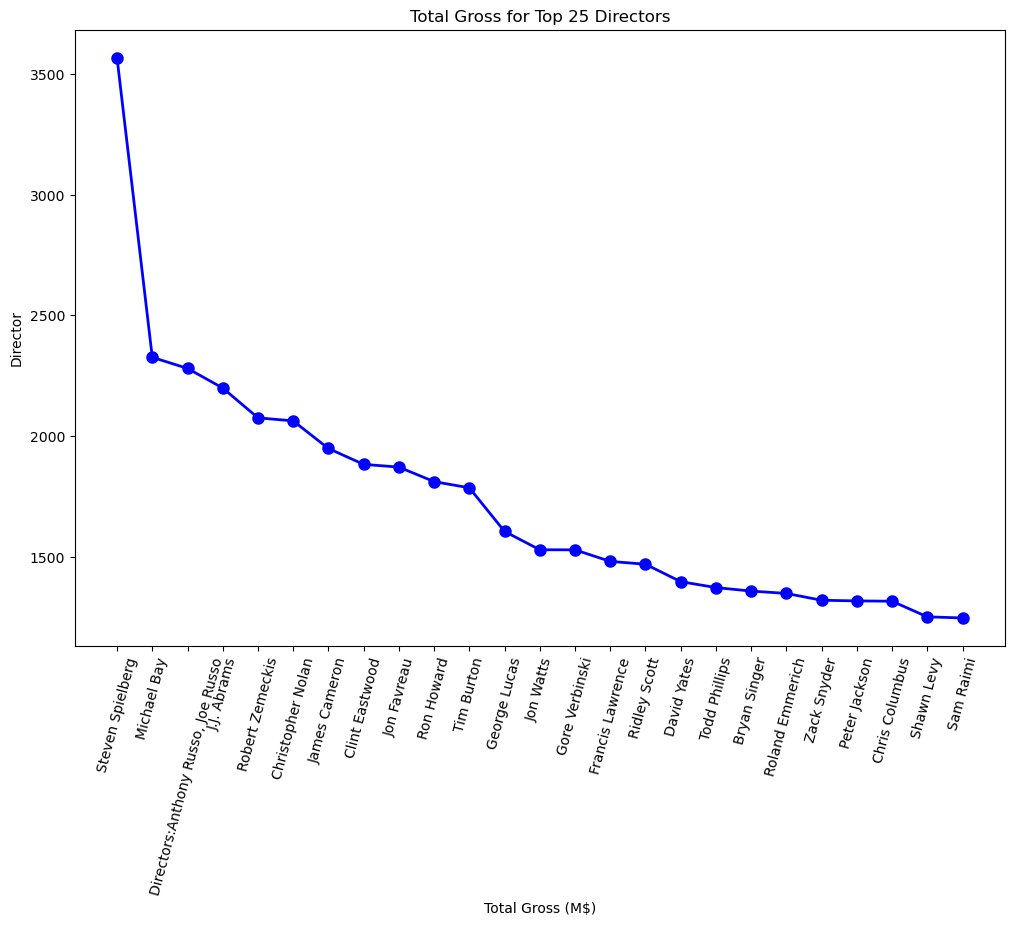

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(director_total_gross_sorted['Director'],director_total_gross_sorted['Total_Gross(M$)'], marker='o', color='b', linewidth=2, markersize=8)
plt.title('Total Gross for Top 25 Directors')
plt.ylabel('Director')
plt.xlabel('Total Gross (M$)')
plt.xticks(rotation=75)
plt.show()

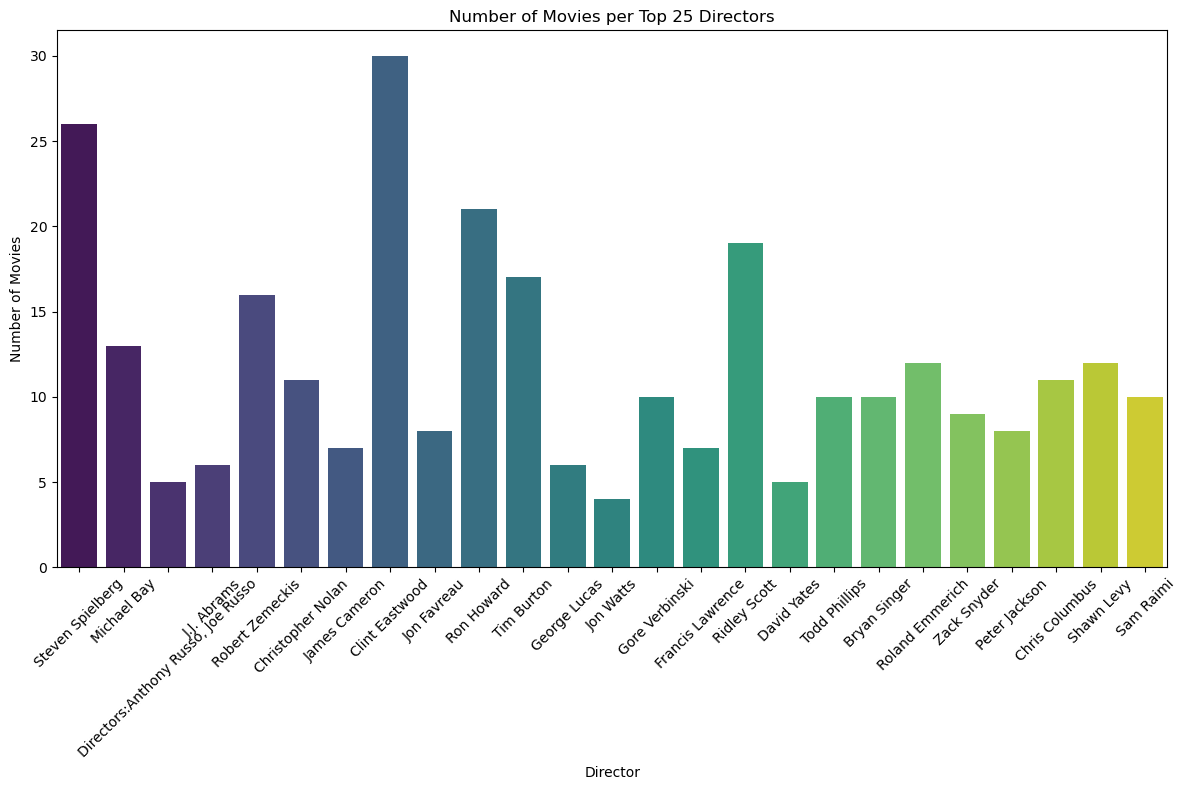

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors_movies['Director'][:25], y=top_directors_movies['Movies_Count'][:25], palette='viridis')
plt.title('Number of Movies per Top 25 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font size="7" color="green">Conclusion 4</font>









#### We checked whether there is necessarily a connection between the profits of the most successful directors and the amount of films they released.  Is a good director necessarily measured only by profit?  A good director is measured by the total profit in relation to the total amount of films he released, if he released few films but earns a total sum on them - we conclude that the films he released were of high quality.  <br>It's not the quantity is the quality!

- #### During the work we used chat GPT.